### DB Connection
We want to make a simple connection between this jupyter notebook and a postgresql database. <br>

We use the table `items` created before (use the )

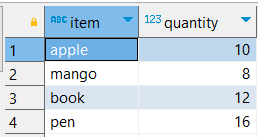

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import psycopg2
from psycopg2.extras import execute_values

#### Define connection with db

In [2]:
dbname = "test_db" 
user = "user" 
password = "password" 
host= "localhost" 
port = "5454" 

In [3]:
connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

In [4]:
curr = connection.cursor()

In the above code we first had define some information about our db:
- database name
- user (name of the owner of the db)
- password (password of the db connection)
- host 
- port

You could find this information in your postgresql database, with **Edit Connection**

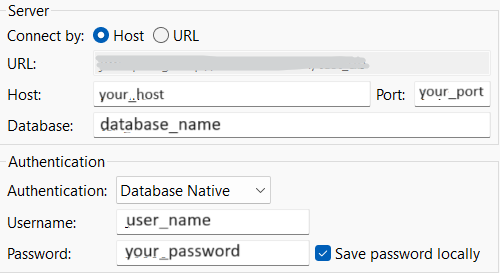

We use the library `psycopg2` to establish a connection between the postgresql database and this notebook. For the connection, we create a variable named `connection` which is defined by the database's information we gave above

With the below box's code, we select the table that we want to analyze / modify and check the connection by taking with `curr.fetchone()` the first record

In [5]:
curr.execute('select * from items')

curr.fetchone()

('apple', 10)

#### Modify a record
We did an error by inserting the quantity of apples. To modify this, we simply use a SQL query and commit changes to the original table in postgresql db

In [6]:
update = "UPDATE items SET quantity = 5 WHERE item = 'apple'"
curr.execute(update)
connection.commit()

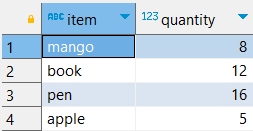

Note that the row with *apple* will be writing at the end of the table

### Delete a record
As above, we use a SQL query to delete a row from the table

In [7]:
delete = "DELETE FROM items WHERE item = 'apple'"
curr.execute(delete)
connection.commit()

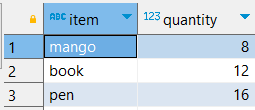

#### Append new rows
Imagine that someone gives you a new list of items to add to the oldest one; so, you want to append these new rows to the exisitng table `items`.

You could use `execute_values` from `psycopg2` library to insert multiple rows (or simply work with multiple rows)

We use data from the file `items.csv`

In [8]:
df = pd.read_csv('items.csv')
df

,item,quantity
0,muffin,13
1,melon,4


In [12]:
df.dtypes

item        object
quantity     int64
dtype: object

Recall that new data must have the same data types of data already in the table.

To insert multiple rows, we use `execute_values` that requires:
- cursor
- intert query
- data to insert

Note that data to insert have to be in array format

In [9]:
execute_values(curr, "INSERT INTO items (item, quantity) VALUES %s", df.values.tolist())

In [10]:
connection.commit()

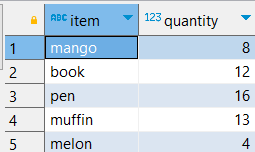